In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import make_scorer ,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv('data/Student_Performance.csv')

In [3]:
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [4]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

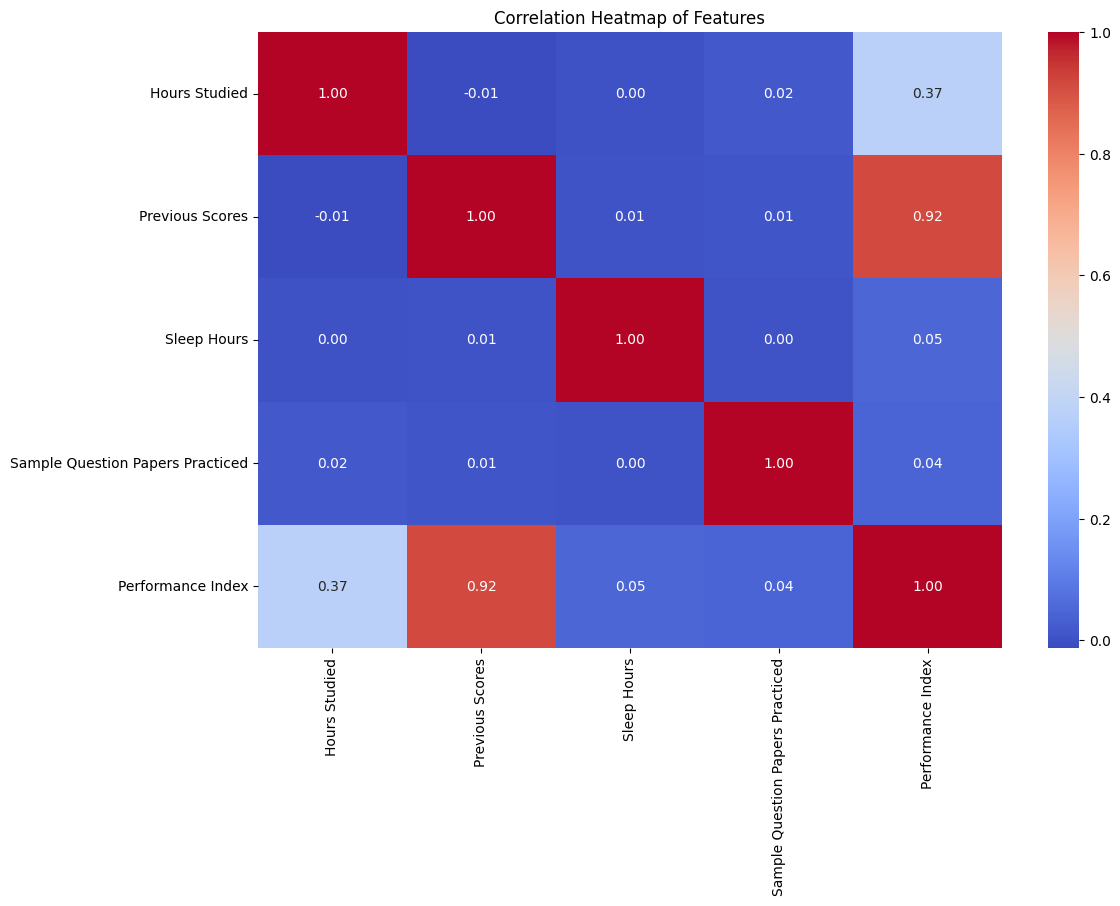

In [5]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

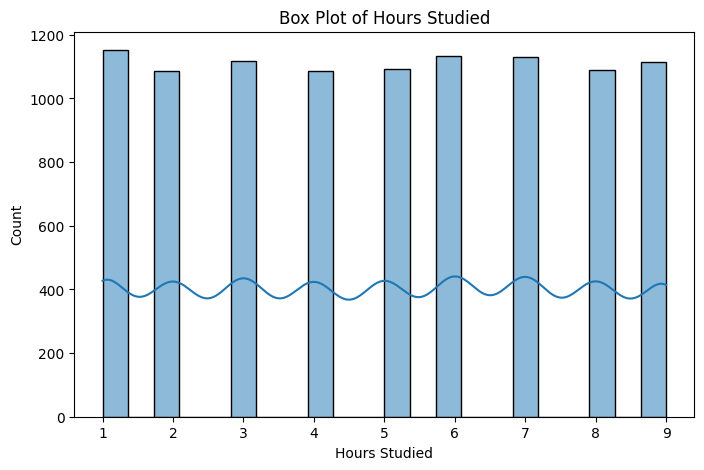

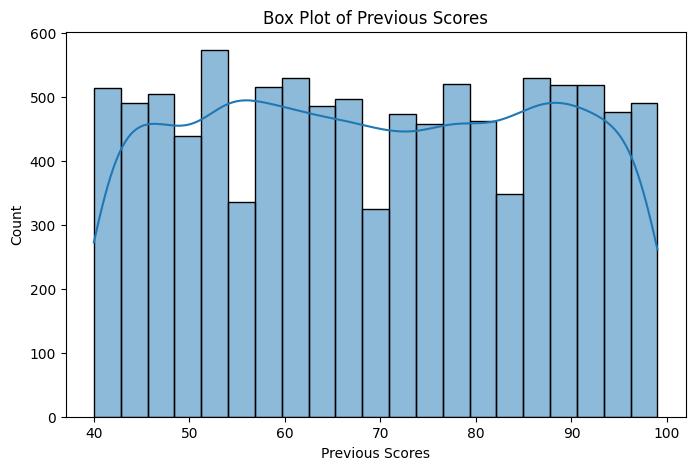

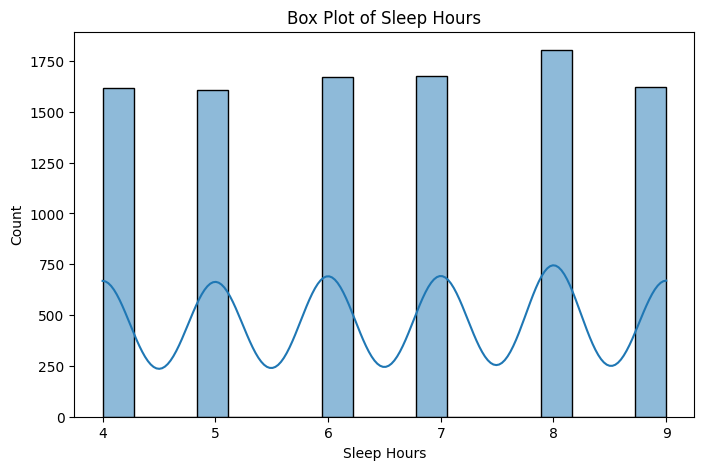

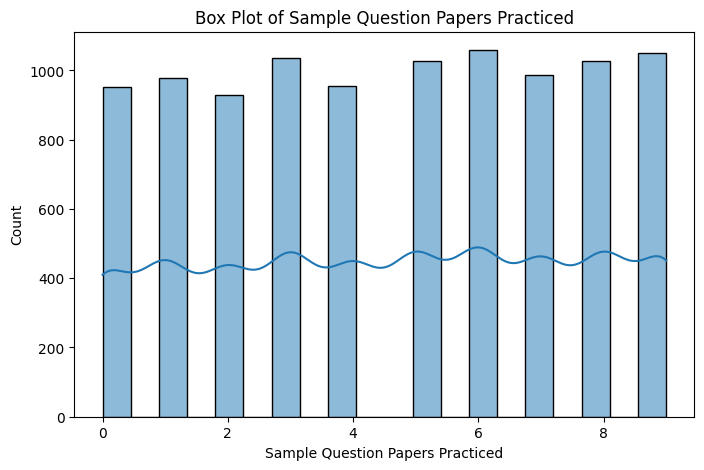

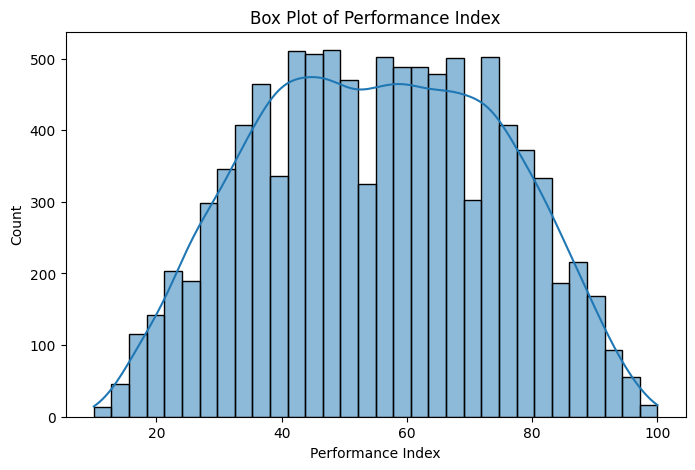

In [6]:
for col in num_cols:
  plt.figure(figsize=(8, 5))
  sns.histplot(df[col] , kde=True)
  plt.title(f'Box Plot of {col}')
  plt.show()

In [7]:
encoder = LabelEncoder()

df["Extracurricular Activities"] =  encoder.fit_transform(df["Extracurricular Activities"])

In [8]:
X = df.drop(columns=["Performance Index"])
Y = df["Performance Index"]

X.sample(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
1414,4,46,0,8,5
818,3,99,0,9,0
428,5,64,1,6,7


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X_train , y_train)

rmse_linear_regression = np.sqrt(mean_squared_error(y_test, linearRegressionModel.predict(X_test)))

linearRegressionModel.score(X_train , y_train)

0.9886898790682355

In [11]:
y_pred = linearRegressionModel.predict(X_test)

In [12]:
decisionTreeModel = DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10)

decisionTreeModel.fit(X_train , y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10)

In [13]:
y_pred1 = decisionTreeModel.predict(X_test)

In [14]:
randomForestModel = RandomForestRegressor(n_estimators=100, random_state=42)

randomForestModel.fit(X_train , y_train)

RandomForestRegressor(random_state=42)

In [15]:
y_pred2 = randomForestModel.predict(X_test)

In [16]:
rmse_linear_regression = np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear Regression RMSE:", rmse_linear_regression)
print("Linear Regression Score:", linearRegressionModel.score(X_test, y_test))

rmse_decision_tree = np.sqrt(np.mean((y_test - y_pred1) ** 2))
print("Decision Tree RMSE:", rmse_decision_tree)

rmse_random_forest = np.sqrt(np.mean((y_test - y_pred2) ** 2))
print("Random Forest RMSE:", rmse_random_forest)


Linear Regression RMSE: 2.0205515085050063
Linear Regression Score: 0.9889832909573145
Decision Tree RMSE: 2.458824164491716
Random Forest RMSE: 2.271307554426923


In [17]:
prediction = np.round(linearRegressionModel.predict(X_test), decimals = 1)

print(f"Prediction for the first test data point : {prediction}")


Prediction for the first test data point : [54.7 22.6 47.9 ... 16.8 63.3 45.9]


In [18]:
m = linearRegressionModel.coef_
b = linearRegressionModel.intercept_

print(f"Linear regression. Slope: {m}. Intercept: {b}")

Linear regression. Slope: [2.85248393 1.0169882  0.60861668 0.47694148 0.19183144]. Intercept: -33.92194621555608


In [19]:
# predict one row of testing data
y_pred = linearRegressionModel.predict(X_test)
print(y_pred)

[54.71185392 22.61551294 47.90314471 ... 16.79341955 63.34327368
 45.94262301]


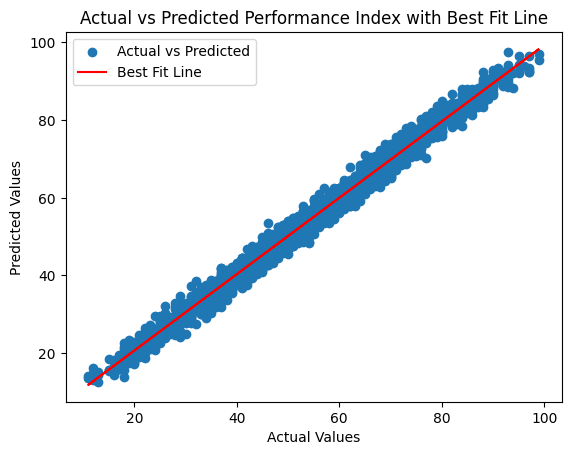

In [20]:
plt.scatter(y_test, prediction, label = 'Actual vs Predicted')

m, b = np.polyfit(y_test, prediction, 1)
best_fit_line = m * y_test + b

plt.plot(y_test, best_fit_line, color = 'red', label = 'Best Fit Line')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Performance Index with Best Fit Line")
plt.legend()

plt.show()

In [21]:
with open('../../API/model.pkl', 'wb') as f:
    pickle.dump(linearRegressionModel, f)

print("Model saved successfully!")    

Model saved successfully!
